# DNN(심층신경망)
- 2개 이상의 은닉층을 가진 신경망 모델

## 심층망 만들기
- 여러개의 dense를 생성 한 후 모델에 하나로 합쳐줌
- dense층의 이름을 설정할 수 있음(설정 안하면 알아서 생성)


### 1. dense생성 후  Sequntial사용해 모델 만들기

```
dense1 = keras.layers.Dense(출력수, activation='  ', input_shape=(), name = '  ')
dense2 = keras.layers.Dense(출력수, activation='  ', name = '  ')
dense3 = keras.layers.Dense(출력수, activation='  ')

model = keras.Sequential([dense1,dense2,dense3])
```

### 2. Sequntial에서 dense를 바로 만들기
```
model = keras.Sequential([
    keras.layers.Dense(출력수, activation='  ', input_shape=(), name = '  '),
    keras.layers.Dense(출력수, activation='  ',  name = '  '),
    keras.layers.Dense(출력수, activation='  ',  name = '  '),
    keras.layers.Dense(출력수, activation='  ',  name = '  ')
])
```

### 3. add를 이용해 모델에 은닉층 추가하기

```
model = keras.Sequential()
model.add(keras.layers.Dense(출력수, activation='  ', input_shape=()))
model.add(keras.layers.Dense(출력수, activation='  '))
```

### 4. 함수형 API
- 더 복잡한 모델을 만들 때(입력이 2개고, 출력도 2개인 경우) seqeuntial 클래스를 사용하기 어려움 -> 함수형 API사용

```
ex)

dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

inputs = keras.Input(shape=(784,))

hidden = dense1(inputs)
outputs = dense2(dense1)

model = keras.Model(inputs, outputs)


```

## Flatten 층
- flatten()함수 : 다차원 배열을 1차원으로 평탄화 해주는 함수 
- 심층망에 입력층은 1차원 배열로 이루어져 있어야 하기때문에 1차원으로의 변환이 필요함


1. 입력 데이터의 shape을 변환해주기
    - data.reshape()


2. Flatten을 사용해 변환층을 만들어주기
    - dense = keras.layers.Flatten(input_shape=(입력데이터의 shape))

# CNN(합성곱 신경망)
- 완전 연결 신경망과 달리 뉴런을 필터 or 커널 이라고 부른다
- 이미지 분류 분야에서 좋은 성능을 보여줌
- 합성곱 연산을 통해 얻은 출력층을 특성맵(feature map)이라고 부름


### CNN 구조
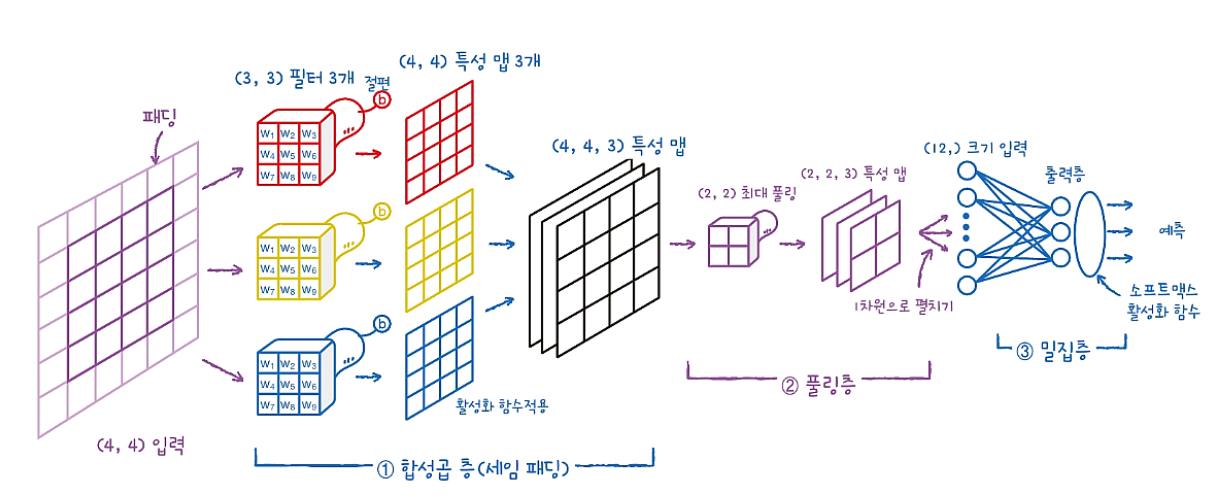

## 합성곱
- 데이터에서 중요한 특성을 뽑아내기 위해서 사용
- 기존의 구조를 그대로 사용
- 커널의 개수가 출력shape의 깊이(차원)을 결정함
- 1차원(문서) : Conv1D, 2차원이상(이미지):Conv2D
    - 1차원
    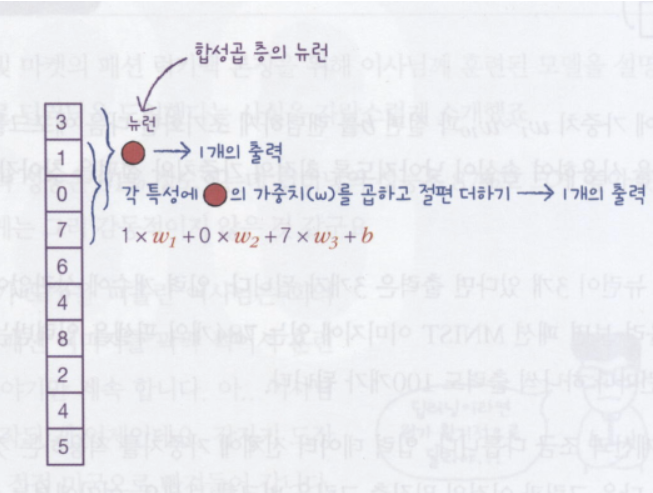
    
    - 2차원(다중 필터) -> 필터의 개수가 깊이결정
    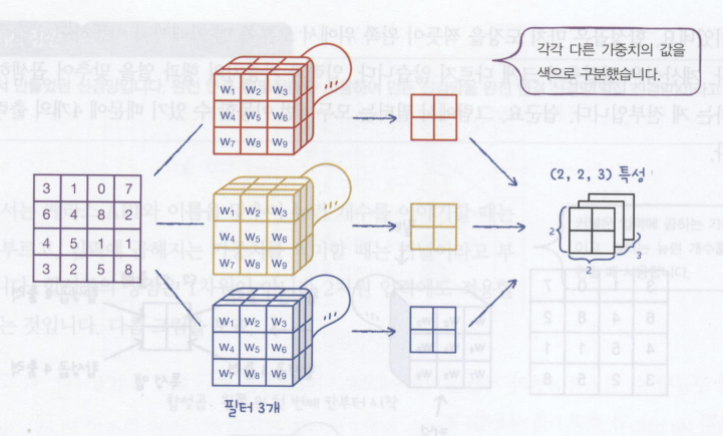
    
    - 고차원 -> 필터는 데이터의 깊이와 같은 깊이의 값으로 생성 -> feature map의 깊이는 1
    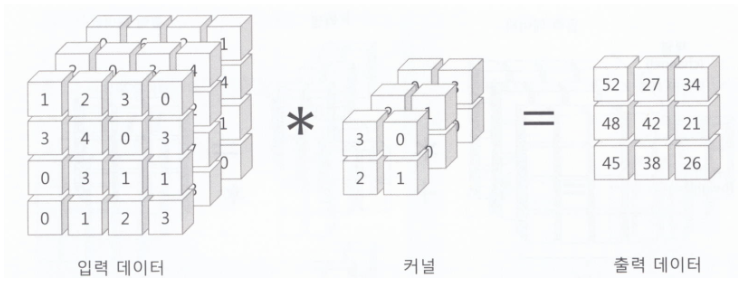

## 합성곱 층 만들기

#### stride 
- 커널을 몇칸씩 이동할지 설정 
- 튜플을 사용해 우,하단으로 이동하는 크기를 각각 지정 가능
- defualt값은 1, 대부분 1의 값을 그대로 사용함

#### 패딩
- featual map의 크기는 기존의 데이터의 크기보다 작아지는 경향이 있음
- 크기가 줄어드는 현상을 방지하기 위해 데이터 주위에 새로운 값을 추가하는 방법을 패딩
- 세임 패딩과 밸리드 패딩이 있음
    - 세임패딩 : 주위를 0으로 패딩 -> 입력데이터와 같은 크기의 특성맵 
    - 밸리드 패딩 : 패딩없이 입력값 그대로 사용 -> 입력의 크기보다 특성맵의 크기가 작다


```
kernel = keras.layers.Conv2D(커널개수, kernel_size=(커널크기), activation='활성화 함수',stride = , padding = )

```

## 풀링 
- 합성곱 층에서 만든 특성맵의 가로,세로를 줄이는 역할을 수행
- 특성맵의 개수는 줄지않음
- 중요한 특징을 잘 뽑아내고 과적합을 줄일 수 있음
- 합성곱에서 크기를 줄이는 것보다 좋은 성능을 냄
- 겹치지 않고 이동을 함
    - max pooling : 최대값을 뽑아냄
    - average pooling : 평균값을 뽑아냄 
    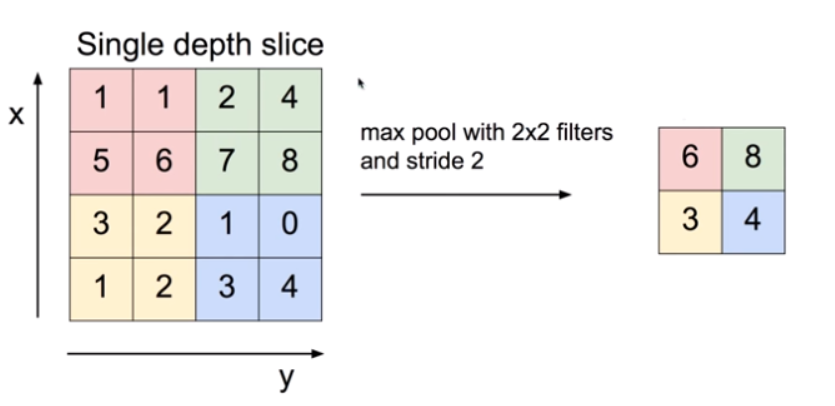

```
keras.layers.MaxPooling2D(풀링의 크기)
keras.layers.AveragePooling2D(풀링의 크기)
```

## 합성곱 신경망의 구조
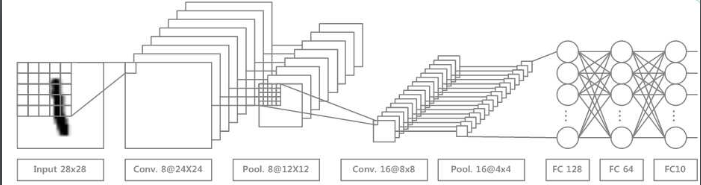

## layer정보 확인하기
- model.layers를 확인하면 model에 추가한 층들을 list의 형태로 불러와 확인이 가능하다
- 원하는 layer에 weights를 이용하면 [가중치, 편향]의 값을 얻을 수 있다
- input과 output을 이용하면 입력과 출력을 확인 할 수 있다(함수형API)


## 함수형 API
- 모델을 만드는 또다른 방법
- 더 복잡한 모델을 만들 때(입력이 2개고, 출력도 2개인 경우)  seqeuntial 클래스를 사용하기 어려움

# RNN(순환신경망)
- seqential data를 사용(텍스트 or 시계열 데이터)를 사용
- 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖음
- 앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향함, 이와 같은 신경망들을 피드 포워드 신경망이라고 함

- 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀이라고 칭한다
- 셀은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 함
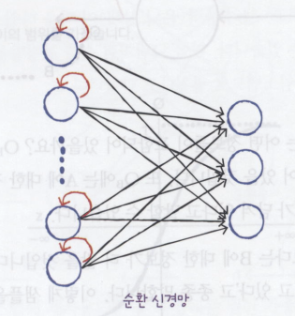

## 순환신경망의 활성화 함수
- 일반적으로 tanh를 많이 사용
- ReLU함수를 사용하기 위해선 행렬의 초깃값에 대한 일정한 제한이 있어야함 (단위행렬로 초기화가 필요)

## 셀의 가중치와 입출력
- 순환신경망의 뉴런은 가중치가 하나 더 있음 = 이전 타임스텝이 은닉상태에 곱해지는 가중치
- 파라미터 구하기 예제
    - 입력특성 : 4개, 순환층 : 3개 일 때
    - 완전연결로 인한 가중치 : 4 * 3 = 12개
    - 타임스텝으로 인한 가중치 : 3 * 3 = 9
    - 편향 : 3
        - 총 합 : 12 + 9 + 3 = 24개 의 파라미터를 갖음
        
- 순환층은 일반적으로 샘플마다 2개의 차원을 갖음, 하나의 샘플을 하나의 시퀀스라고 한다
- 시퀀스의 길이가 타임스텝의 길이가 됨

## Embedding
- 언어의 벡터화
- 문자를 인식하지 못하기 때문에 숫자로 변환해주는 작업이 필요한다

### keras.layers.Embedding
- 모델 형성 시 임베딩 층을 형성한다
- keras.layers.Embedding(어휘사전의 크기, 임베딩 벡터의 크기, input_length = 입력의 길이)

## 순환망 층 만들기

```
keras.layers.SimpleRNN(셀의개수, input_shape =())
```

## 고급 순환층
- LSTM
- GRN